In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1

In [ ]:
PATH =  "/content/drive/MyDrive/Colab Notebooks/data/"
df = pd.read_csv(PATH + "prog_workers.csv", sep=",")
df

,Firstname,Lastname,Country,Date,Decimal number,Experience,Prog_Language
0,Jolyn,Elsinore,Brazil,16-01-1981,8672.38,3,Basic
1,Candi,Fax,Norfolk Island,21-03-1998,15095.28,5,C#
2,Jessy,Gillan,Central African Republic,02-10-1985,28243.89,2,С++
3,Benita,Tice,French Southern Territories,17-08-1975,24273.18,1,С++
4,Arlina,Peonir,Canada,25-12-1993,26938.66,3,PHP
...,...,...,...,...,...,...,...
1495,Gloria,Sheng,Mongolia,15-05-1999,16805.69,2,C#
1496,Kimberley,Maxi,Argentina,06-02-1982,15323.02,5,Assembler
1497,Roxane,Shirberg,Hong Kong,20-01-1980,7010.41,1,Assembler
1498,Nickie,Ahab,Iceland,03-08-1970,12453.41,5,Java


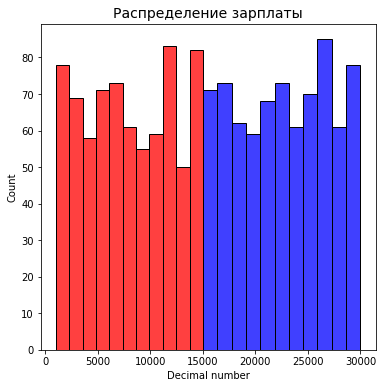

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Распределение зарплаты', fontsize=14)
sns.histplot(data=df.loc[df['Decimal number'] >= 15000], x='Decimal number', ax=ax, color='blue')
sns.histplot(data=df.loc[df['Decimal number'] < 15000], x='Decimal number', ax=ax, color='red')

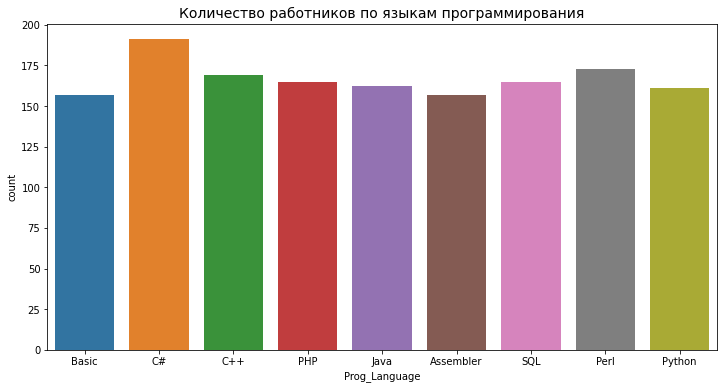

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Количество работников по языкам программирования', fontsize=14)
sns.countplot(data=df, x='Prog_Language', ax=ax)

In [ ]:
tmp = df.groupby(['Prog_Language']).mean()
tmp 

,Decimal number,Experience
Prog_Language,,
Assembler,15884.116369,2.866242
Basic,14974.924140,2.866242
C#,15168.767696,2.989529
Java,14888.397840,3.055556
PHP,15874.409576,2.939394
Perl,15886.018266,2.872832
Python,14598.959689,2.981366
SQL,15178.154424,3.121212
С++,16169.809882,2.923077


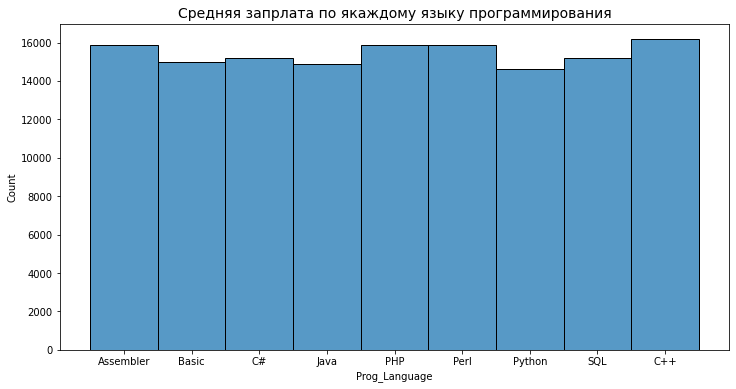

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Средняя запрлата по якаждому языку программирования', fontsize=14)
sns.histplot(data=tmp, x='Prog_Language', weights=tmp['Decimal number'], ax=ax)

In [ ]:
tmp = df.groupby(['Prog_Language', 'Experience']).count().reset_index().pivot(index='Prog_Language', columns='Experience', values='Decimal number')
tmp.head()

Experience,1,2,3,4,5
Prog_Language,,,,,
Assembler,37,35,28,26,31
Basic,35,35,29,32,26
C#,23,56,42,40,30
Java,32,33,26,36,35
PHP,32,36,32,40,25


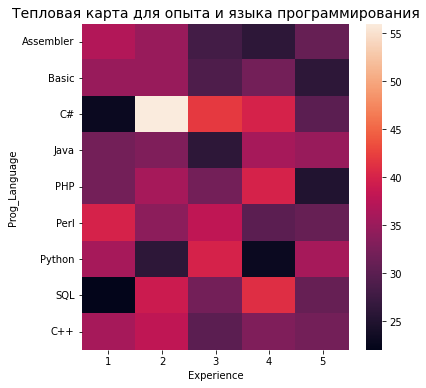

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Тепловая карта для опыта и языка программирования', fontsize=14)
sns.heatmap(data=tmp, ax=ax)

In [ ]:
from datetime import date
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

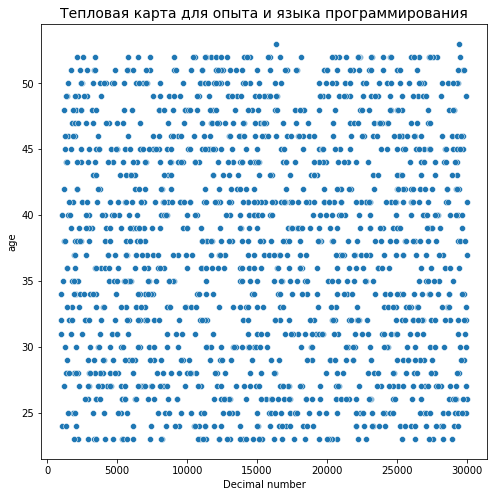

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Тепловая карта для опыта и языка программирования', fontsize=14)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['age'] = df['Date'].apply(calculate_age) 
sns.scatterplot(data=df, x='Decimal number', y='age', ax=ax)

# 2

In [ ]:
PATH =  "/content/drive/MyDrive/Colab Notebooks/data/"
df = pd.read_csv(PATH + "Visa_countries.csv", sep=",", encoding='cp1251')
df

,№,Перечень стран,Режим въезда с дипломатическим паспортом,Режим въезда со служебным паспортом,Режим въезда с общегражданским паспортом
0,1,Абхазия,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 90 дней)
1,2,Австралия,Визовый,Визовый,Визовый
2,3,Австрия,Безвизовый (до 90 дней в течение 180 дней),Визовый,Визовый
3,4,Азербайджан,Безвизовый,Безвизовый,Безвизовый
4,5,Албания,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Визовый
...,...,...,...,...,...
191,192,ЮАР,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 90 дней)
192,193,Южная Осетия,Безвизовый,Безвизовый,Безвизовый
193,194,Южный Судан,Визовый,Визовый,Визовый
194,195,Ямайка,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 30 дней)


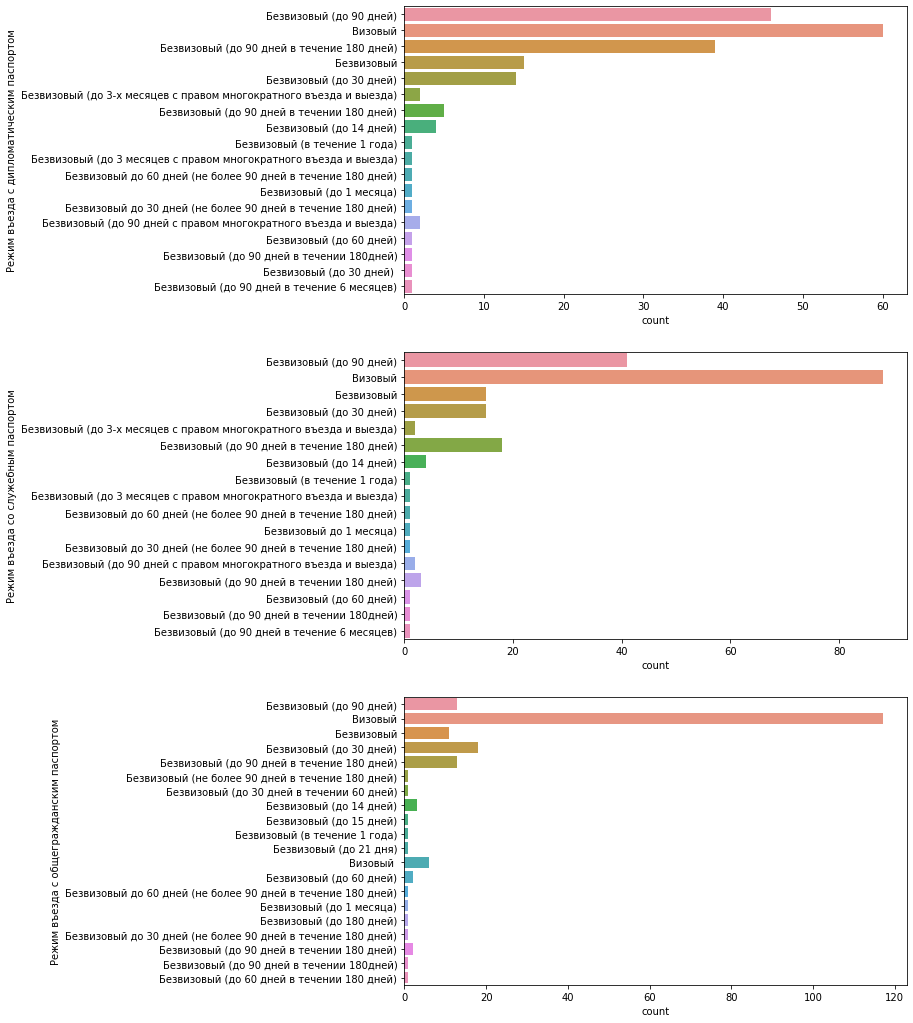

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(9, 18))
sns.countplot(data=df, y='Режим въезда с дипломатическим паспортом', orient='v', ax=ax[0])
sns.countplot(data=df, y='Режим въезда со служебным паспортом', orient='v', ax=ax[1])
sns.countplot(data=df, y='Режим въезда с общегражданским паспортом', orient='v', ax=ax[2])

In [ ]:
tmp = df.groupby(by=['Режим въезда с дипломатическим паспортом',
                    'Режим въезда со служебным паспортом',
                    'Режим въезда с общегражданским паспортом']).count().reset_index()
tmp.head()

,Режим въезда с дипломатическим паспортом,Режим въезда со служебным паспортом,Режим въезда с общегражданским паспортом,№,Перечень стран
0,Безвизовый,Безвизовый,Безвизовый,11,11
1,Безвизовый,Безвизовый,Визовый,3,3
2,Безвизовый,Безвизовый,Визовый,1,1
3,Безвизовый (в течение 1 года),Безвизовый (в течение 1 года),Безвизовый (в течение 1 года),1,1
4,Безвизовый (до 1 месяца),Безвизовый до 1 месяца),Безвизовый (до 1 месяца),1,1


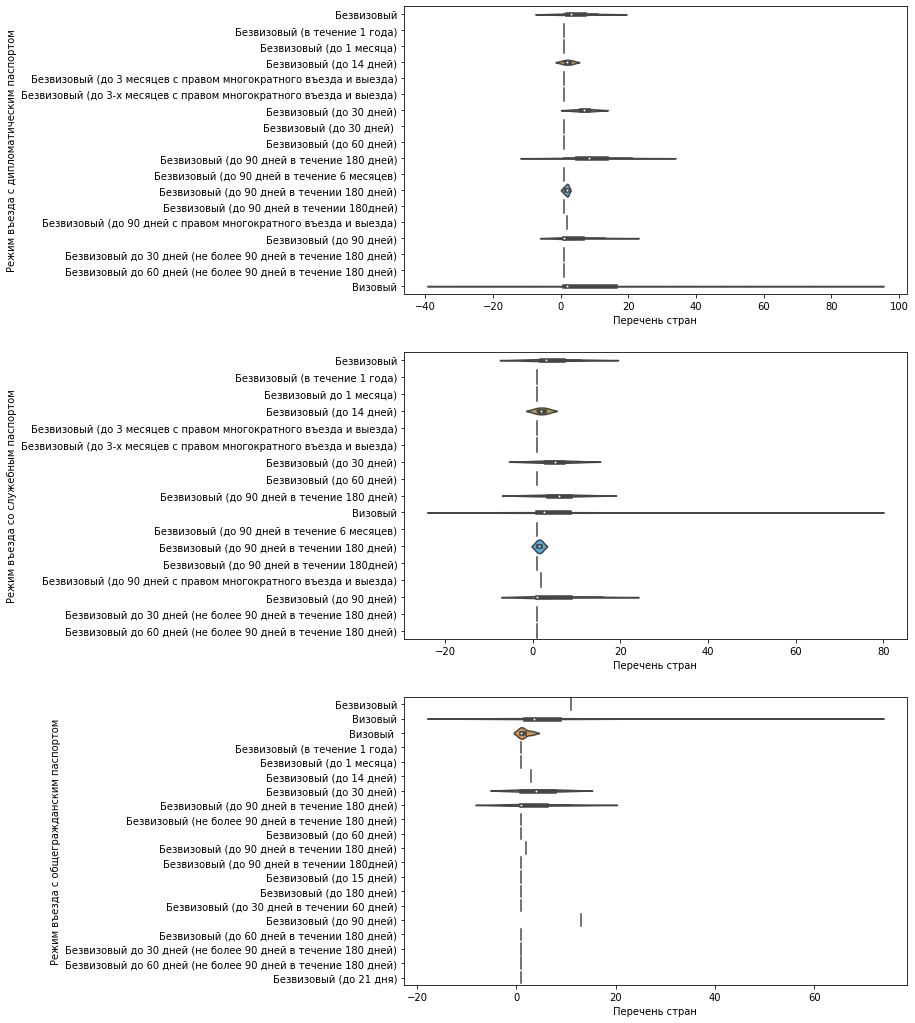

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(9, 18))
sns.violinplot(data=tmp, x="Перечень стран", y="Режим въезда с дипломатическим паспортом", ax=ax[0])
sns.violinplot(data=tmp, x="Перечень стран", y='Режим въезда со служебным паспортом', ax=ax[1])
sns.violinplot(data=tmp, x="Перечень стран", y='Режим въезда с общегражданским паспортом', ax=ax[2])


# 3

In [ ]:
df = pd.read_csv(PATH + "flight delays.csv", sep=";", encoding='cp1251', skipinitialspace=True)[:31]
df.head()

,Наименование Авиакомпании,Общее количество рейсов выполненых ВСЕГО,Общее количество рейсов Задержанных ИТОГО,Общее количество рейсов Задержанных ПРОЦЕНТ,Количество рейсов задержанных более двух часов ВСЕГО,Количество рейсов задержанных более двух часов РАСП,Количество рейсов задержанных более двух часов В/р ВНУТР,Количество рейсов задержанных более трех часов ВСЕГО,Количество рейсов задержанных более трех часов РАСП,Количество рейсов задержанных более трех часов В/р ВНУТР,Количество рейсов задержанных более четырех часов ВСЕГО,Количество рейсов задержанных более четырех часов РАСП,Количество рейсов задержанных более четырех часов В/р ВНУТР,Количество рейсов задержанных более пяти часов ВСЕГО,Количество рейсов задержанных более пяти часов РАСП,Количество рейсов задержанных более пяти часов В/р ВНУТР,Количество рейсов задержанных более шести часов ВСЕГО,Количество рейсов задержанных более шести часов РАСП,Количество рейсов задержанных более шести часов В/р ВНУТР
0,АВРОРА авиакомпания (АО),1767.0,57.0,"3,23",17.0,15.0,2.0,8.0,7.0,1.0,7.0,6.0,1.0,8.0,8.0,0.0,17.0,16.0,1.0
1,АЗУР ЭЙР,57.0,4.0,"7,02",1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,АЙ ФЛАЙ,5.0,1.0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,АЛРОСА авиакомпания,658.0,54.0,"8,21",20.0,8.0,12.0,17.0,11.0,6.0,7.0,4.0,3.0,2.0,2.0,0.0,8.0,4.0,4.0
4,АНГАРА авиакомпания,833.0,37.0,"4,44",17.0,11.0,6.0,13.0,8.0,5.0,3.0,1.0,2.0,0.0,0.0,0.0,4.0,3.0,1.0


In [ ]:
a10 = df.sort_values(by='Общее количество рейсов выполненых ВСЕГО', ascending=False)[:10]
a10

,Наименование Авиакомпании,Общее количество рейсов выполненых ВСЕГО,Общее количество рейсов Задержанных ИТОГО,Общее количество рейсов Задержанных ПРОЦЕНТ,Количество рейсов задержанных более двух часов ВСЕГО,Количество рейсов задержанных более двух часов РАСП,Количество рейсов задержанных более двух часов В/р ВНУТР,Количество рейсов задержанных более трех часов ВСЕГО,Количество рейсов задержанных более трех часов РАСП,Количество рейсов задержанных более трех часов В/р ВНУТР,Количество рейсов задержанных более четырех часов ВСЕГО,Количество рейсов задержанных более четырех часов РАСП,Количество рейсов задержанных более четырех часов В/р ВНУТР,Количество рейсов задержанных более пяти часов ВСЕГО,Количество рейсов задержанных более пяти часов РАСП,Количество рейсов задержанных более пяти часов В/р ВНУТР,Количество рейсов задержанных более шести часов ВСЕГО,Количество рейсов задержанных более шести часов РАСП,Количество рейсов задержанных более шести часов В/р ВНУТР
5,АЭРОФЛОТ-РОССИЙСКИЕ АВИАЛИНИИ,18404.0,328.0,"1,78",161.0,159.0,2.0,71.0,71.0,0.0,32.0,32.0,0.0,18.0,18.0,0.0,46.0,43.0,3.0
28,ЮТЭЙР авиакомпания,6436.0,133.0,"2,07",52.0,18.0,34.0,18.0,3.0,15.0,13.0,5.0,8.0,11.0,2.0,9.0,39.0,12.0,27.0
25,СИБИРЬ авиакомпания,5476.0,70.0,"1,28",15.0,15.0,0.0,11.0,11.0,0.0,8.0,8.0,0.0,7.0,7.0,0.0,29.0,29.0,0.0
19,РОССИЯ авиакомпания,5228.0,81.0,"1,55",24.0,24.0,0.0,10.0,10.0,0.0,4.0,4.0,0.0,5.0,5.0,0.0,38.0,38.0,0.0
26,УРАЛЬСКИЕ АВИАЛИНИИ авиакомпания,3734.0,295.0,"7,9",105.0,102.0,3.0,63.0,61.0,2.0,31.0,30.0,1.0,20.0,20.0,0.0,76.0,76.0,0.0
8,ГЛОБУС (ООО) а/к,2312.0,54.0,"2,34",16.0,16.0,0.0,11.0,11.0,0.0,6.0,6.0,0.0,4.0,4.0,0.0,17.0,17.0,0.0
17,ПОБЕДА авиакомпания (ООО),1882.0,30.0,"1,59",15.0,5.0,10.0,3.0,0.0,3.0,3.0,0.0,3.0,1.0,0.0,1.0,8.0,5.0,3.0
0,АВРОРА авиакомпания (АО),1767.0,57.0,"3,23",17.0,15.0,2.0,8.0,7.0,1.0,7.0,6.0,1.0,8.0,8.0,0.0,17.0,16.0,1.0
21,РУСЛАЙН авиационная компания,1677.0,109.0,"6,5",34.0,29.0,5.0,18.0,16.0,2.0,18.0,17.0,1.0,12.0,12.0,0.0,27.0,27.0,0.0
30,ЯМАЛ авиационная трансп. компания,1442.0,76.0,"5,27",23.0,2.0,21.0,13.0,0.0,13.0,8.0,0.0,8.0,10.0,0.0,10.0,22.0,5.0,17.0


In [ ]:
del a10['Общее количество рейсов выполненых ВСЕГО']
del a10['Наименование Авиакомпании']
del a10['Общее количество рейсов Задержанных ИТОГО']
del a10['Общее количество рейсов Задержанных ПРОЦЕНТ']

<ipython-input-149-e78d119fd47e>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


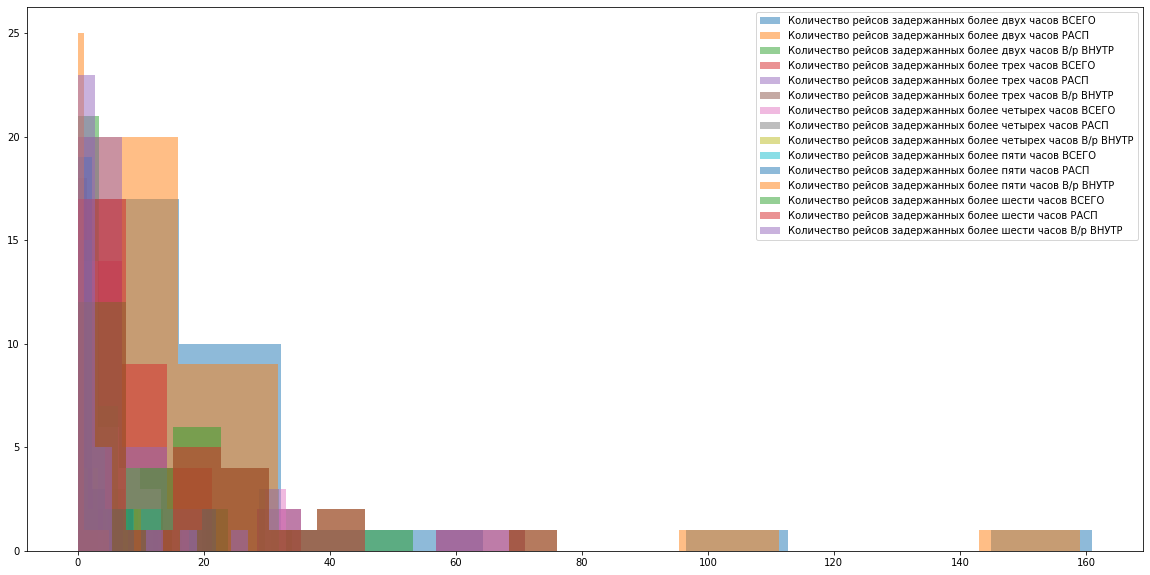

In [ ]:
fig = plt.figure(figsize=(20, 10))
axes_ticks = []
for el in a10.columns:
    ax = plt.subplot()
    ax.hist(df[el], label=el, alpha=0.5)
    ax.legend()
    fig.add_axes(ax)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='Количество рейсов задержанных более двух часов ВСЕГО',
                    y='Общее количество рейсов Задержанных ИТОГО',
                    z='Общее количество рейсов выполненых ВСЕГО',
                    width=800, height=800)
fig.show()

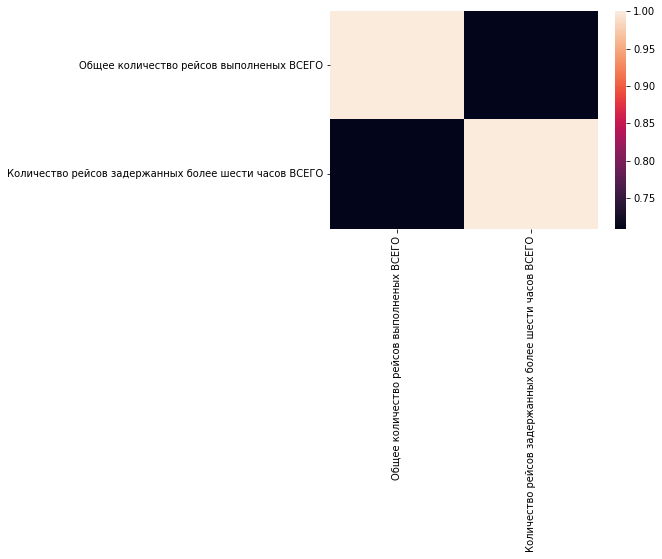

In [ ]:
sns.heatmap(df[:20][['Общее количество рейсов выполненых ВСЕГО',
                     'Количество рейсов задержанных более шести часов ВСЕГО']].corr())